# Homework 2 - Machine Learning
### ist1103000, Pedro Lima     ; ist1103179, Diogo Costa (Group 029)

#### II. Programming
### 1)
#### a)

In [18]:
import pandas as pd
from scipy.io.arff import loadarff

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [13]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold

input_vars = df.drop("class", axis=1)
output_vars = df["class"]

knn_classifier = KNeighborsClassifier(n_neighbors=5)
naive_bayes_calssifier = GaussianNB()

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
knn_fold_accuracies = []
naive_bayes_fold_accuracies = []
for train_k, test_k in folds.split(input_vars, output_vars):
    X_train, X_test = input_vars.iloc[train_k], input_vars.iloc[test_k]
    y_train, y_test = output_vars.iloc[train_k], output_vars.iloc[test_k]
    
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    knn_fold_accuracies.append(round(metrics.accuracy_score(y_test, y_pred),2))

    naive_bayes_calssifier.fit(X_train, y_train)
    y_pred = naive_bayes_calssifier.predict(X_test)
    naive_bayes_fold_accuracies.append(round(metrics.accuracy_score(y_test, y_pred),2))

print(knn_fold_accuracies)
print(naive_bayes_fold_accuracies)

[0.94, 0.81, 0.87, 0.94, 0.74, 0.87, 0.84, 0.84, 0.77, 0.77]
[0.84, 0.87, 0.84, 0.87, 0.77, 0.84, 0.9, 0.81, 0.77, 0.71]


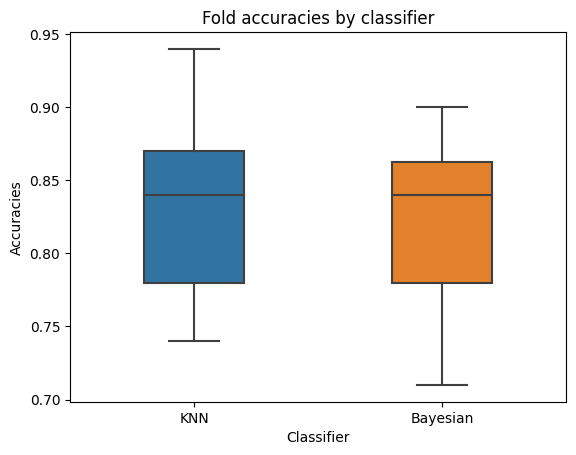

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({'Accuracies': knn_fold_accuracies+naive_bayes_fold_accuracies, 'Classifier': ["KNN"]*10+["Bayesian"]*10})
sns.boxplot(data=df, x='Classifier', y='Accuracies', width=0.4).set(title='Fold accuracies by classifier')
plt.show()

#### b)

In [15]:
from scipy.stats import ttest_rel

test_results = ttest_rel(knn_fold_accuracies, naive_bayes_fold_accuracies, alternative='less')
print(test_results)

TtestResult(statistic=0.9923982173934255, pvalue=0.8265333762138204, df=9)


Since our alternative hypothesis is the KNN accuracy mean being similar to the Bayesian accuracy mean and the value obtained is about 82,70%, we can't reject the alterantive hypothesis for standard significance levels, so we can't certainly assume that the null hypothesis is true.

### 2)

[[ 37  23   0]
 [ 14  80   6]
 [  1   7 142]]
[[ 39  21   0]
 [ 19  78   3]
 [  1   6 143]]


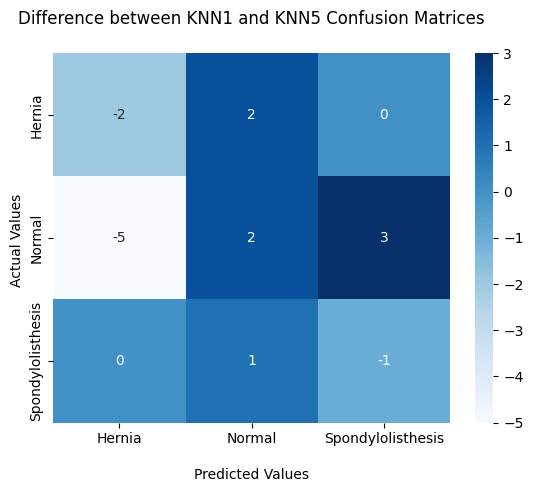

In [16]:
from sklearn.metrics import confusion_matrix
from functools import reduce

knn_classifier_1 = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
knn_classifier_5 = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

confusion_matrix_knn1 = []
confusion_matrix_knn5 = []
for train_k, test_k in folds.split(input_vars, output_vars):
    X_train, X_test = input_vars.iloc[train_k], input_vars.iloc[test_k]
    y_train, y_test = output_vars.iloc[train_k], output_vars.iloc[test_k]
    
    knn_classifier_1.fit(X_train, y_train)
    y_pred = knn_classifier_1.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=["Hernia" , "Normal", "Spondylolisthesis"])
    confusion_matrix_knn1.append(cm)

    knn_classifier_5.fit(X_train, y_train)
    y_pred = knn_classifier_5.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=["Hernia" , "Normal", "Spondylolisthesis"])
    confusion_matrix_knn5.append(cm)

cumulative_cm_knn1 = (reduce(lambda a,b: a+b, confusion_matrix_knn1))
cumulative_cm_knn5 = (reduce(lambda a,b: a+b, confusion_matrix_knn5))

print(cumulative_cm_knn1)
print(cumulative_cm_knn5)

diff_cm = cumulative_cm_knn1 - cumulative_cm_knn5

ax = sns.heatmap(diff_cm, annot=True, cmap='Blues')

ax.set_title('Difference between KNN1 and KNN5 Confusion Matrices\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Hernia","Normal","Spondylolisthesis"])
ax.yaxis.set_ticklabels(["Hernia","Normal","Spondylolisthesis"])

## Display the visualization of the Confusion Matrix.
plt.show()


By analyzing the previous plot, we can infer that there isn't much of a difference between the observations registered using KNN1 and KNN5 (it goes neither under -5 nor more than 2), concluding that both approaches end up having a similar behavior.

### 3)

When learning from column_diagnosis using the Naïves Bayes approach, we are assuming independence among every input variable, which may not be the case since we don't know how the variables are related, possibly leading to incorrect results (in this dataset, for example, we have three features related to "pelvis", so they are more likely related than not). Also, our dataset only has continuous features and so our results may not be optimal, since some of those features may not follow a Gaussian distribution, as the Naïve Bayes approach assumes. This approach is also affected by the presence of irrelevant data and/or variables and may give them unnecessary importance when making predictions.